In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [10]:
df = pd.read_csv('data/intervals.csv', nrows=15000)

In [11]:
# using matplotlib directly from df.hist()
# ax = df.hist(column='interval', by='uniquename', bins=50, grid=True, layout=(5,1), figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [12]:
# for i,x in enumerate(ax):
#    print(i, type(x))

In [13]:
# make the groupby object (this will be a Series with a Name)
gps = df.groupby(by='uniquename')['interval']

In [14]:
# output the basic stats of the Series, per group
gps.describe()

,count,mean,std,min,25%,50%,75%,max
uniquename,,,,,,,,
1000-0,267.0,1016.363296,694.352475,441.0,893.0,901.0,907.0,9909.0
1000-1,6575.0,1190.463878,988.947321,70.0,896.0,902.0,910.0,15285.0
1000-10,1904.0,4113.344013,4594.299328,54.0,1012.0,2694.0,5391.0,37801.0
1000-101,5293.0,1480.439070,1030.144822,2.0,1174.0,1207.0,1258.0,18386.0
1000-11,956.0,3680.764644,6150.089094,3.0,874.0,953.5,3506.5,50933.0


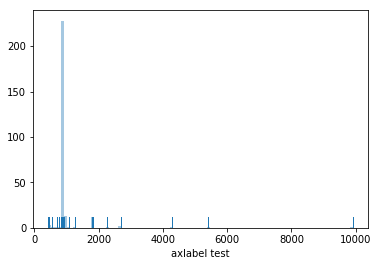

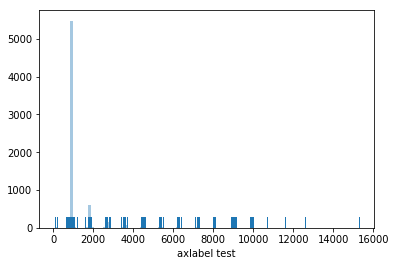

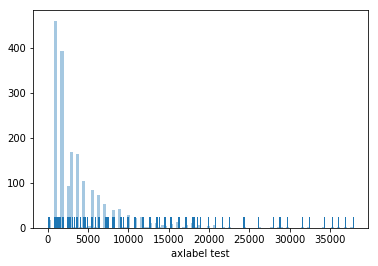

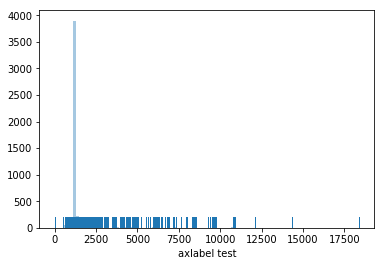

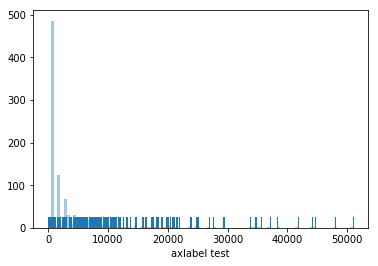

In [18]:
for (name, vals) in gps:
    plt.figure()
    sns.distplot(vals, bins=100, rug=True, kde=False, label="test", axlabel="axlabel test")

In [16]:
gpnames = []
# get the names into a list - the values don't matter now
for (name, vals) in gplist:
    gpnames.append(name)
    plt.figure()
    sns.distplot(vals, label=name, kde=False)

NameError: name 'gplist' is not defined

In [ ]:
for gp in gpnames:
    print(gp)
    # now get the data
    vals = gps.get_group(gp)
    print(len(vals))
    plt.figure()
    sns.distplot(vals, kde=False)